In [1]:
pip install pyodbc sqlalchemy


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from sqlalchemy import create_engine

server = "localhost"       
database = "QAECECRM_DA_MayFT1-2025-8-12-18-9"   
driver = "ODBC Driver 17 for SQL Server"  

connection_string = f"mssql+pyodbc://@{server}/{database}?driver={driver}"
engine = create_engine(connection_string)

In [3]:
# Exploring the Data
import pandas as pd

query = "SELECT * from dbo.BlueCard;"   
df = pd.read_sql(query, engine)

print(df.shape)
print(df.head())

(200008, 32)
   BlueCardId  AgentId  PresenterId           AccountName OrganizationName  \
0           0      228    1002268.0  UVA,SKKG KAPPA KAPPA             None   
1       10436      270    3009000.0  5TH SEASON/HOLIDAY I             None   
2       13510      253    5292700.0     RADISSON/RICHMOND             None   
3       14757      253    3411000.0  OKEMO MOUNTAIN RESOR             None   
4       17083      197    1062200.0  UNIVERSITY OF CENTRA             None   

   EventTypeId  LeadId  VenueId VenueName VenuePhysicalAddress1  ... IsClosed  \
0         99.0     NaN      NaN      None                  None  ...     True   
1         99.0     NaN      NaN      None                  None  ...     True   
2         99.0     NaN      NaN      None                  None  ...     True   
3         99.0     NaN      NaN      None                  None  ...     True   
4         99.0     NaN      NaN      None                  None  ...     True   

  IsInProgress  ClosedReasonId 

In [4]:
print(df.isnull().sum())


BlueCardId                     0
AgentId                        0
PresenterId               126547
AccountName                 7896
OrganizationName          132495
EventTypeId                 1312
LeadId                    171610
VenueId                   180901
VenueName                 132533
VenuePhysicalAddress1     132906
VenuePhysicalAddress2     132906
VenuePhysicalCity         132533
VenuePhysicalStateId      133838
VenuePhysicalZip          132906
VenuePhysicalCountryId    134255
VenueSettingId            168919
VenueCapacity             197068
IsSettingCovered          133761
IsPublicEvent             133761
EventTime                  99361
EventBudget                94716
Notes                      93302
IsClosed                       0
IsInProgress                   0
ClosedReasonId             41755
ClosedDate                  4276
CreatedDate                    0
CreatedById                    0
UpdatedDate                  695
UpdatedById                  695
ArchiveDat

In [5]:
print(df.info())

print(df.describe())

print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200008 entries, 0 to 200007
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   BlueCardId              200008 non-null  int64         
 1   AgentId                 200008 non-null  int64         
 2   PresenterId             73461 non-null   float64       
 3   AccountName             192112 non-null  object        
 4   OrganizationName        67513 non-null   object        
 5   EventTypeId             198696 non-null  float64       
 6   LeadId                  28398 non-null   float64       
 7   VenueId                 19107 non-null   float64       
 8   VenueName               67475 non-null   object        
 9   VenuePhysicalAddress1   67102 non-null   object        
 10  VenuePhysicalAddress2   67102 non-null   object        
 11  VenuePhysicalCity       67475 non-null   object        
 12  VenuePhysicalStateId    66170 

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#plt.figure(figsize=(12,6))
#sns.heatmap(df.isnull(), cbar=False)
#plt.title("Missing Data Heatmap")
#plt.show()


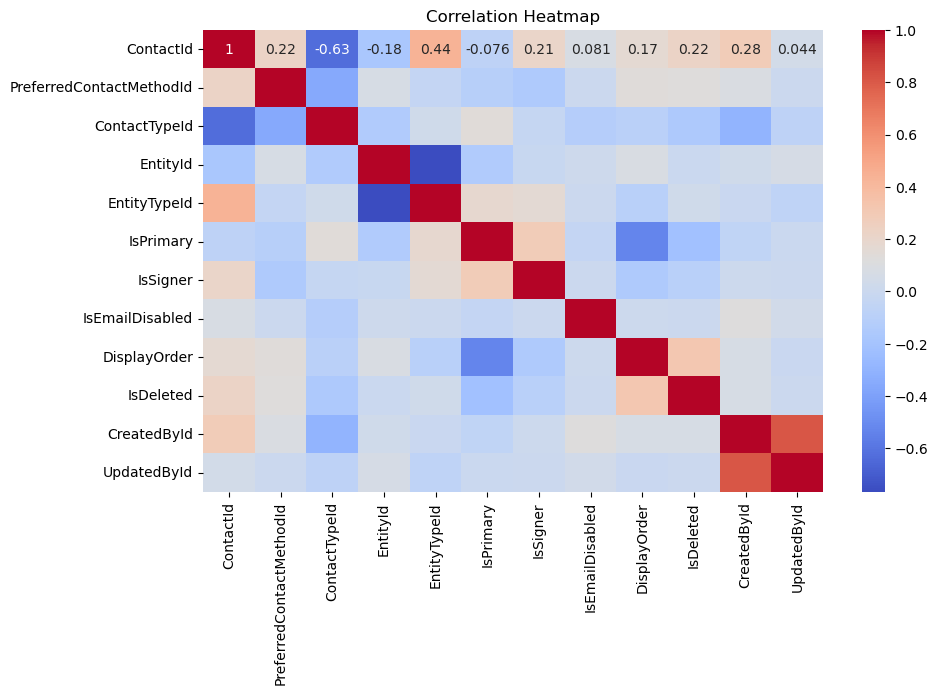

In [86]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



In [11]:
df['CreatedDate'] = pd.to_datetime(df['CreatedDate'], errors='coerce')
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'], errors='coerce')

df['CreatedYear'] = df['CreatedDate'].dt.year
sns.countplot(x='CreatedYear', data=df)
plt.title("Number of BlueCards Created per Year")
plt.xticks(rotation=45)
plt.show()

df['EventBudget'] = (
    df['EventBudget']
    .astype(str)                 
    .str.replace('[\$,]', '', regex=True) ,
    .str.strip()                
)

df['EventBudget'] = pd.to_numeric(df['EventBudget'], errors='coerce')

df.groupby('CreatedYear')['EventBudget'].mean().plot(kind='line', marker='o')
plt.title("Average Event Budget per Year")
plt.ylabel("Event Budget")
plt.show()



SyntaxError: invalid syntax (3533624097.py, line 14)

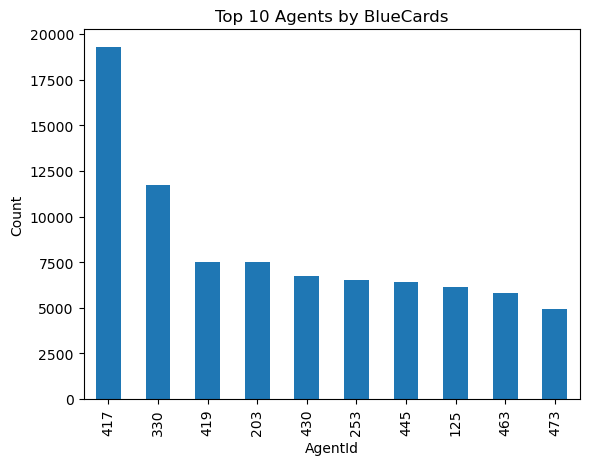

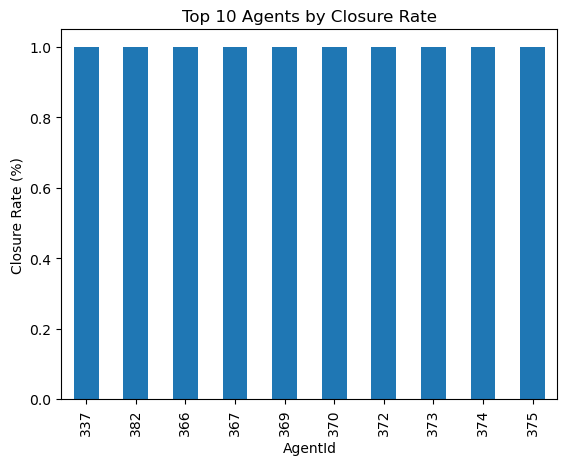

In [12]:
top_agents = df['AgentId'].value_counts().head(10)
top_agents.plot(kind='bar')
plt.title("Top 10 Agents by BlueCards")
plt.xlabel("AgentId")
plt.ylabel("Count")
plt.show()

# Closed Rate per Agent
closed_rate = df.groupby('AgentId')['IsClosed'].mean().sort_values(ascending=False).head(10)
closed_rate.plot(kind='bar')
plt.title("Top 10 Agents by Closure Rate")
plt.ylabel("Closure Rate (%)")
plt.show()

In [13]:
query = "SELECT * from dbo.Lead;"   
df = pd.read_sql(query, engine)

print(df.shape)
print(df.head())

(46646, 39)
   LeadId  AgentId  RecommendedAgentId FirstName    LastName  \
0       1      NaN                 NaN      ryan  abrahamsen   
1       2    106.0               253.0    Joseph    Hallahan   
2       3    253.0                 NaN   Caitlin     Whissel   
3       4    307.0                 NaN      Ryan      Brewer   
4       5    417.0                 NaN   Presley     Bennett   

            EmailAddress   PhoneNumber  CanText            EventDate  \
0  ryan.a@teleofilms.com  804-677-1456     True  2018-06-29 00:00:00   
1     jhal.gwu@gmail.com  315-657-6942     True  2018-10-14 00:00:00   
2    cewhissel@gmail.com  410-707-0975     True  2018-10-27 00:00:00   
3   Mrbrewer42@gmail.com  704-241-6229     True  2018-08-18 00:00:00   
4  psbennett92@gmail.com  662-902-6385     True  2019-03-16 00:00:00   

         EventVenueName  ...          SubmissionDate  IsClosed  \
0                  test  ... 2018-06-03 21:00:47.037      True   
1  The Market at Grelen  ... 2018-06-0

In [14]:
print(df.isnull().sum().sort_values(ascending=False).head(15))

df = df.drop_duplicates()

df.columns = df.columns.str.strip()

date_cols = ["CreatedDate", "ClosedDate", "SubmissionDate", "UpdatedDate", "ArchiveDate", "EventDate"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df["IsClosed"] = df["IsClosed"].astype(bool)

df["FirstName"] = df["FirstName"].str.strip().str.title()
df["LastName"] = df["LastName"].str.strip().str.title()

ArchiveDate           46644
LineOfBusinessId      46636
RecommendedAgentId    46235
ArtistId              29428
Participant2TypeId    23262
Participant1TypeId    22723
EventStateId          12943
EventDate              1798
AgentId                1511
ClosedDate              680
UpdatedById              51
UpdatedDate              51
WebData                  25
ReferralEventDate        25
EmailAddress             17
dtype: int64


In [15]:
df["CreatedYear"] = df["CreatedDate"].dt.year
df["CreatedMonth"] = df["CreatedDate"].dt.month

df["LeadLifetimeDays"] = (df["ClosedDate"] - df["CreatedDate"]).dt.days

df["HasAgent"] = df["AgentId"].notnull()

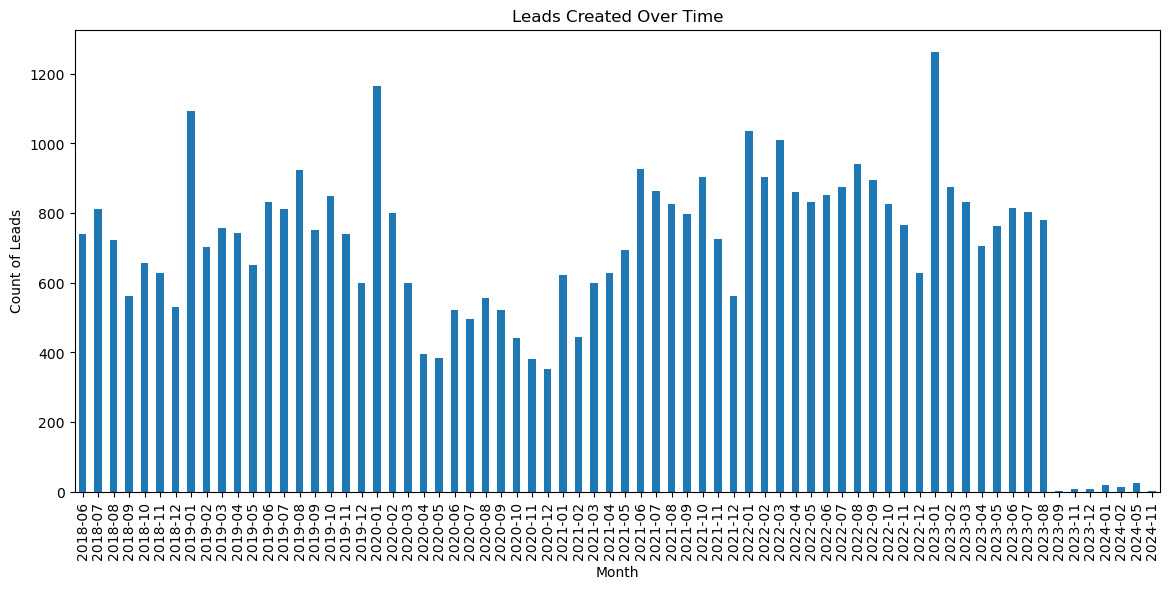

In [16]:
df["CreatedDate"].dt.to_period("M").value_counts().sort_index().plot(kind="bar", figsize=(14,6))
plt.title("Leads Created Over Time")
plt.xlabel("Month")
plt.ylabel("Count of Leads")
plt.show()

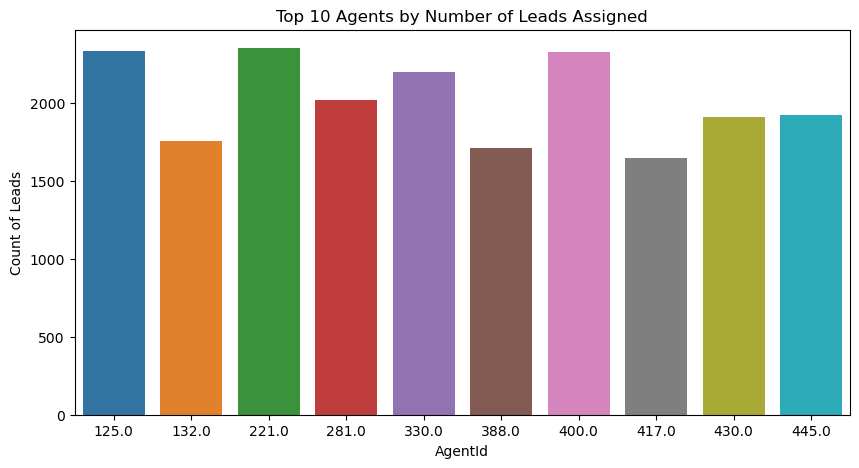

In [17]:
agent_counts = df["AgentId"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=agent_counts.index, y=agent_counts.values)
plt.title("Top 10 Agents by Number of Leads Assigned")
plt.xlabel("AgentId")
plt.ylabel("Count of Leads")
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


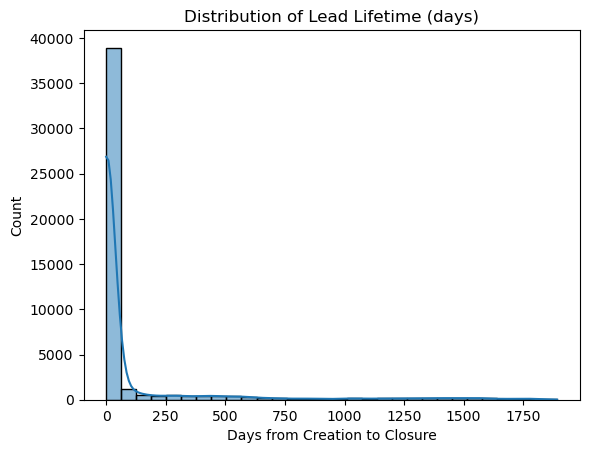

In [18]:
sns.histplot(df["LeadLifetimeDays"].dropna(), bins=30, kde=True)
plt.title("Distribution of Lead Lifetime (days)")
plt.xlabel("Days from Creation to Closure")
plt.show()

In [19]:
closure_rate = df["IsClosed"].value_counts(normalize=True) * 100
print(closure_rate)

IsClosed
True     98.829482
False     1.170518
Name: proportion, dtype: float64


### Person 1: Time-Based Performance Trends


In [20]:
query = "SELECT * from dbo.Contract;"   
df = pd.read_sql(query, engine)

print(df.shape)
print(df.head())

(303633, 70)
   ContractId  AgentId  OfficeId  ContractStatusId  LineOfBusinessId   Gross  \
0      100304        0      17.0                 3               2.0  1700.0   
1      101731      419       1.0                 6               3.0   550.0   
2      103324        0       1.0                 4               3.0  2000.0   
3      103331      313       1.0                 5               3.0  1500.0   
4      103526        0       1.0                 3               3.0  1000.0   

   BlueCardId  LeadSourceId  ContractTypeId IsReseller  ...  CreatedDate  \
0         NaN           3.0             1.0       True  ...   1988-09-15   
1         NaN           5.0             1.0       True  ...   1989-01-03   
2         NaN           5.0             1.0      False  ...   2001-04-28   
3         NaN           5.0             1.0       True  ...   1989-04-28   
4         NaN           5.0             1.0      False  ...   1989-05-15   

  CreatedById             UpdatedDate UpdatedById

In [21]:
query = "SELECT * from dbo.Contact;"   
df = pd.read_sql(query, engine)

print(df.shape)
print(df.head())

(845353, 18)
   ContactId FirstName     LastName  PreferredContactMethodId  ContactTypeId  \
0          1     RICKY        TANIS                         1            999   
1          2     WAYNE        BAKER                         1            999   
2          3    DONALD  QUISENBERRY                         2            999   
3          4       LEE    [Unknown]                         2            999   
4          5      JACK        BIRCH                         2            999   

       EmailAddress  EntityId  EntityTypeId Notes  IsPrimary  IsSigner  \
0              None         8             1  None       True      True   
1              None        32             1  None       True      True   
2  fatband1@cox.net        82             1  None       True     False   
3  fatband1@cox.net        82             1  None      False     False   
4   jbirch3@cox.net        82             1  None      False     False   

   IsEmailDisabled  DisplayOrder  IsDeleted             Creat

In [22]:
query3 = "Select ArtistId, Name, AgentId,AgencyName,MailingAddress1,MailingAddress2,MailingCity,MailingStateId,MailingZip,MailingCountryId,PhysicalAddressCity,PhysicalAddressStateId,PhysicalGeoLatitude,PhysicalGeoLongitude,PayeeName,PaymentInfo,TIN,TINHashed,ArefMailingInstructions,BankName,BankRoutingNumber,BankAccountNumber,IsW9OnFile,W9OnFileDate,Is1099Exempt,OtherTerms,Notes,SalesPitchNotes,IsExclusive,ExclusiveStartDate,IsDateClearedByRA,IsActive,IsNational,NationalAgencyId,SecretKey,NationalNetPriceLowerBound,NationalNetPriceUpperBound,NationalOneOffPrice,CreatedDate,CreatedById,UpdatedDate,UpdatedById,ArchiveDate,IsAR,ContractLink,IsNotParticipating,IsDirectDeposit from dbo.Artist;"

In [23]:
query4 = "Select * from dbo.BlueCardArtist;"

In [52]:
query5 = "Select * from dbo.PayrollPayment"

In [53]:
payroll_df = pd.read_sql(query5, engine)
payroll_df.head()

,PayrollPaymentId,PayrollBatchId,AgentId,GrossCommissionAmount,NetCommissionAmount,AgentWorkingAmount,SharedBonusAmount,NonExclusiveArtistFeeAmount,CafeteriaPlanAmount,PayrollAmount,YTDGrossCommissionAmount,YTDNetCommissionAmount,PostDate,IsDeleted,CreatedDate,CreatedById,UpdatedDate,UpdatedById,IsExclude
0,1,1,110,1757.0,702.8,0.0,0.0,0.0,0.0,702.8,0.0,0.0,1999-01-15,False,2018-06-02 04:32:22.230,0,None,None,False
1,2,1,125,760.0,266.0,0.0,0.0,0.0,0.0,266.0,0.0,0.0,1999-01-15,False,2018-06-02 04:32:22.230,0,None,None,False
2,3,1,134,850.0,255.0,0.0,0.0,0.0,0.0,255.0,0.0,0.0,1999-01-15,False,2018-06-02 04:32:22.230,0,None,None,False
3,4,1,140,112.5,45.0,0.0,0.0,0.0,0.0,45.0,0.0,0.0,1999-01-15,False,2018-06-02 04:32:22.230,0,None,None,False
4,5,1,163,600.0,210.0,0.0,0.0,0.0,0.0,210.0,0.0,0.0,1999-01-15,False,2018-06-02 04:32:22.230,0,None,None,False


In [24]:
df1 = pd.read_sql(query4, engine)
df1.head()


,BlueCardArtistId,BlueCardId,ArtistId,Gross,Net,Notes,IsDeleted,CreatedDate,CreatedById,UpdatedDate,UpdatedById
0,1,0,136,3250.0,0.0,None,False,2018-06-02 04:06:42.950,0,NaT,NaN
1,2,0,296,7750.0,0.0,w/ female,False,2018-06-02 04:06:42.950,0,NaT,NaN
2,3,0,11183,0.0,0.0,None,False,2018-06-02 04:06:42.950,0,NaT,NaN
3,4,0,15104,0.0,0.0,None,False,2018-06-02 04:06:42.950,0,NaT,NaN
4,5,0,15104,0.0,0.0,None,False,2018-06-02 04:06:42.950,0,NaT,NaN


In [25]:
df2 = pd.read_sql(query3, engine)

In [26]:
df2.head()

,ArtistId,Name,AgentId,AgencyName,MailingAddress1,MailingAddress2,MailingCity,MailingStateId,MailingZip,MailingCountryId,...,NationalOneOffPrice,CreatedDate,CreatedById,UpdatedDate,UpdatedById,ArchiveDate,IsAR,ContractLink,IsNotParticipating,IsDirectDeposit
0,2,O,NaN,None,9008 MICHAUX LANE,None,RICHMOND,46.0,23229,1.0,...,NaN,2018-06-02 04:05:01.677,0,NaT,NaN,None,True,None,False,False
1,3,GROOVE DELUXE,NaN,None,703 SUMMERWOOD DRIVE,None,ROCK HILL,41.0,29732,1.0,...,NaN,2018-06-02 04:05:01.677,0,NaT,NaN,None,True,None,False,False
2,4,QUINTON PARKER BAND,NaN,None,"212 B HENRY CLAY RD, APT. #1",None,ASHLAND,46.0,23005,1.0,...,NaN,2018-06-02 04:05:01.677,0,NaT,NaN,None,True,None,False,False
3,5,BILL BOLEN BAND (4),NaN,,1427 GRAYBLUFF TRAIL,,CHAPEL HILL,28.0,27517,1.0,...,NaN,2018-06-02 04:05:01.683,0,2018-09-19 15:21:38.730,469.0,None,True,None,False,False
4,6,88 KEYS WILSON,NaN,,611 HENRY AVE,,CHARLOTTESVILLE,46.0,22901,1.0,...,NaN,2018-06-02 04:05:01.683,0,2019-11-18 15:16:17.807,469.0,None,True,None,False,False


In [31]:
df3=pd.merge(df2, df1, on = 'ArtistId', how='inner')

In [32]:
df3.shape

(829413, 57)

In [33]:
#df3.columns('CreatedById', 'UpdatedDate', 'UpdatedID')

TypeError: 'Index' object is not callable

In [34]:
# Dropping Duplicate columns and only looking at the aartist attributes
blue = df2.copy()
blue = blue.drop(columns=['CreatedDate','CreatedById','UpdatedDate','UpdatedById'])
Artist_records = pd.merge(df3, blue, on='ArtistId', how='inner')

In [35]:
Artist_records.head()

,ArtistId,Name_x,AgentId_x,AgencyName_x,MailingAddress1_x,MailingAddress2_x,MailingCity_x,MailingStateId_x,MailingZip_x,MailingCountryId_x,...,NationalAgencyId_y,SecretKey_y,NationalNetPriceLowerBound_y,NationalNetPriceUpperBound_y,NationalOneOffPrice_y,ArchiveDate_y,IsAR_y,ContractLink_y,IsNotParticipating_y,IsDirectDeposit_y
0,2,O,NaN,None,9008 MICHAUX LANE,None,RICHMOND,46.0,23229,1.0,...,NaN,b'o\x85>\x1aHI\xc2\x1dz\x81\xf5\xed\xa1 \x01\x...,NaN,NaN,NaN,None,True,None,False,False
1,2,O,NaN,None,9008 MICHAUX LANE,None,RICHMOND,46.0,23229,1.0,...,NaN,b'o\x85>\x1aHI\xc2\x1dz\x81\xf5\xed\xa1 \x01\x...,NaN,NaN,NaN,None,True,None,False,False
2,2,O,NaN,None,9008 MICHAUX LANE,None,RICHMOND,46.0,23229,1.0,...,NaN,b'o\x85>\x1aHI\xc2\x1dz\x81\xf5\xed\xa1 \x01\x...,NaN,NaN,NaN,None,True,None,False,False
3,2,O,NaN,None,9008 MICHAUX LANE,None,RICHMOND,46.0,23229,1.0,...,NaN,b'o\x85>\x1aHI\xc2\x1dz\x81\xf5\xed\xa1 \x01\x...,NaN,NaN,NaN,None,True,None,False,False
4,2,O,NaN,None,9008 MICHAUX LANE,None,RICHMOND,46.0,23229,1.0,...,NaN,b'o\x85>\x1aHI\xc2\x1dz\x81\xf5\xed\xa1 \x01\x...,NaN,NaN,NaN,None,True,None,False,False


In [36]:
Artist_records.shape

(829413, 99)

In [37]:
df1.head()

,BlueCardArtistId,BlueCardId,ArtistId,Gross,Net,Notes,IsDeleted,CreatedDate,CreatedById,UpdatedDate,UpdatedById
0,1,0,136,3250.0,0.0,None,False,2018-06-02 04:06:42.950,0,NaT,NaN
1,2,0,296,7750.0,0.0,w/ female,False,2018-06-02 04:06:42.950,0,NaT,NaN
2,3,0,11183,0.0,0.0,None,False,2018-06-02 04:06:42.950,0,NaT,NaN
3,4,0,15104,0.0,0.0,None,False,2018-06-02 04:06:42.950,0,NaT,NaN
4,5,0,15104,0.0,0.0,None,False,2018-06-02 04:06:42.950,0,NaT,NaN


In [38]:

merged = pd.merge(
 df2[['ArtistId', 'Name']],
    df1[['ArtistId', 'Gross', 'Net']],
    on = 'ArtistId',
    how = 'left'
)

In [39]:
merged.head()

,ArtistId,Name,Gross,Net
0,2,O,1250.0,0.0
1,2,O,2000.0,0.0
2,2,O,900.0,0.0
3,2,O,1075.0,850.0
4,2,O,0.0,0.0


In [40]:
# aggrerate it
result = merged.groupby(['ArtistId', 'Name'], as_index=False)['Net'].sum()

In [41]:
result = result.sort_values('Net',ascending=False)

In [42]:
# Revenue by Marketplace
# "What is the total revenue by marketplace or sales channel?"


result.rename(columns={'Net': 'Total_Revenue'})

,ArtistId,Name,Total_Revenue
10688,13910,PARTY ON THE MOON,2596717.0
12912,16629,SIMPLY IRRESISTIBLE,2206907.5
4441,5006,POWERHOUSE: Next Generation,2150240.0
13440,17251,JESSIE'S GIRLS,1685113.0
282,296,THE VOLTAGE BROTHERS,1517135.0
...,...,...,...
8627,9652,JIM LAULETTA,0.0
8623,9648,FRANKIE CONDON ORCHESTRA,0.0
8622,9647,COMEDY SPORTZ 1/2 COURT,0.0
8621,9646,NEW YAZOO REVUE,0.0


In [43]:
result.shape

(23590, 3)

In [ ]:
df1.head()

### Person 2: Drilldowns and Filters


In [44]:
# Filter Transactions by Year, Month, and Customer 
# "How can I retrieve revenue/expenses/profit for a specific year, month, or customer?"

merged_artist = pd.merge(df2[['ArtistId', 'Name']],
                  df1, on = 'ArtistId', how = 'inner'
)
merged_artist

,ArtistId,Name,BlueCardArtistId,BlueCardId,Gross,Net,Notes,IsDeleted,CreatedDate,CreatedById,UpdatedDate,UpdatedById
0,2,O,25837,112108,1250.0,0.0,CK PRICE W/JOE,False,2018-06-02 04:06:43.890,0,NaT,NaN
1,2,O,25840,112109,2000.0,0.0,None,False,2018-06-02 04:06:43.890,0,NaT,NaN
2,2,O,26062,112241,900.0,0.0,SEE AT BOGART'S,False,2018-06-02 04:06:43.920,0,NaT,NaN
3,2,O,26104,112253,1075.0,850.0,None,False,2018-06-02 04:06:43.920,0,NaT,NaN
4,2,O,26118,112261,0.0,0.0,None,False,2018-06-02 04:06:43.920,0,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
829408,104186,KARLTON TAYLOR TRIO,828671,867408,0.0,NaN,,False,2023-08-30 13:29:24.940,1000359,2023-08-31 23:18:45.527,1000359.0
829409,104187,Barnstorm,827707,867229,29800.0,NaN,,False,2023-08-25 15:39:51.393,310,NaT,NaN
829410,104187,Barnstorm,827715,866737,20000.0,NaN,,False,2023-08-25 16:21:53.050,281,NaT,NaN
829411,104189,"""FluteBae"" - Ashley Crawford",827953,854734,1000.0,600.0,for 2 hours with breaks,False,2023-08-28 13:22:48.090,1000399,2023-08-28 13:23:31.990,1000399.0


In [45]:
merged_artist['Month'] = pd.to_datetime(merged_artist['CreatedDate']).dt.month

In [46]:
merged_artist['Year'] = pd.to_datetime(merged_artist['CreatedDate']).dt.year

In [47]:
merged_artist.tail()

,ArtistId,Name,BlueCardArtistId,BlueCardId,Gross,Net,Notes,IsDeleted,CreatedDate,CreatedById,UpdatedDate,UpdatedById,Month,Year
829408,104186,KARLTON TAYLOR TRIO,828671,867408,0.0,NaN,,False,2023-08-30 13:29:24.940,1000359,2023-08-31 23:18:45.527,1000359.0,8,2023
829409,104187,Barnstorm,827707,867229,29800.0,NaN,,False,2023-08-25 15:39:51.393,310,NaT,NaN,8,2023
829410,104187,Barnstorm,827715,866737,20000.0,NaN,,False,2023-08-25 16:21:53.050,281,NaT,NaN,8,2023
829411,104189,"""FluteBae"" - Ashley Crawford",827953,854734,1000.0,600.0,for 2 hours with breaks,False,2023-08-28 13:22:48.090,1000399,2023-08-28 13:23:31.990,1000399.0,8,2023
829412,104194,Test_Artist,829275,867522,400.0,NaN,,False,2024-02-12 17:36:11.983,3,NaT,NaN,2,2024


In [58]:
# Filter by specific year, month, or customer (artist)
filter1 = merged_artist[
    (merged_artist['Year'] == 2023) &
    (merged_artist['Month'] == 8) &
    (merged_artist['Name'] == 'Barnstorm')
].copy()  

filter1['Gross'] = filter1['Gross'].fillna(0)
filter1['Net'] = filter1['Net'].fillna(0)

filter1['Profit'] = filter1['Gross'] - filter1['Net']

total_revenue = filter1['Gross'].sum()
total_expenses = filter1['Net'].sum()
total_profit = filter1['Profit'].sum()

print("Revenue:", total_revenue)
print("Expenses:", total_expenses)
print("Profit:", total_profit)

Revenue: 49800.0
Expenses: 0.0
Profit: 49800.0


In [65]:
# Replace NaN with mean
filter1['Gross'] = filter1['Gross'].fillna(filter1['Gross'].mean())
filter1['Net'] = filter1['Net'].fillna(filter1['Net'].mean())

# Profit calculation
filter1['Profit'] = filter1['Gross'] - filter1['Net']

# Totals
total_revenue = filter1['Gross'].sum()
total_expenses = filter1['Net'].sum()
total_profit = filter1['Profit'].sum()

print("Revenue:", total_revenue)
print("Expenses:", total_expenses)
print("Profit:", total_profit)

Revenue: 49800.0
Expenses: 0.0
Profit: 49800.0


In [66]:
print("Total rows:", len(merged_artist))
print("Gross nulls:", merged_artist['Gross'].isna().sum())
print("Net nulls:", merged_artist['Net'].isna().sum())
print("Net == 0 count:", (merged_artist['Net']==0).sum())

# sample rows with missing Net to inspect why:
merged_artist[merged_artist['Net'].isna()].sample(5)

Total rows: 829413
Gross nulls: 10071
Net nulls: 366233
Net == 0 count: 422089


,ArtistId,Name,BlueCardArtistId,BlueCardId,Gross,Net,Notes,IsDeleted,CreatedDate,CreatedById,UpdatedDate,UpdatedById,Month,Year
456197,18281,PERFECT 10 BAND,607062,827950,23750.0,NaN,plus 8,False,2020-08-31 12:10:43.220,417,2020-08-31 12:53:01.243,417.0,8,2020
633413,31176,SHIMMER BAND,622534,830238,8250.0,NaN,,False,2020-12-22 14:37:13.623,221,2020-12-22 14:43:51.833,221.0,12,2020
524787,19460,IRRESISTIBLE GROOVE,795317,861600,7500.0,NaN,,False,2023-04-04 10:22:58.237,400,NaT,NaN,4,2023
807134,101923,BLAZE THE CITY,727546,849063,5525.0,NaN,,False,2022-05-23 17:42:19.963,1000359,2022-05-23 17:49:23.200,1000359.0,5,2022
770913,64738,BIG CITY RHYTHM,619606,830028,7500.0,NaN,,False,2020-12-01 12:13:14.227,221,2020-12-01 12:14:18.507,221.0,12,2020


### Person 3: Agent Performance & Retention


In [82]:
# Customer Retention/Attrition by Agent

# "How many customers were retained or lost by each agent YoY?"

query6 = "Select * from dbo.AppUser;"

In [83]:
df_ret = pd.read_sql(query6, engine)
df_ret.head()

,AppUserId,FirstName,LastName,PhoneOffice,PhoneCell,Username,Password,PasswordSalt,PasswordLastChanged,IsActive,...,LastLoginDate,PasswordToken,PasswordTokenDate,LandingPageId,AgentUserId,CreatedDate,CreatedById,UpdatedDate,UpdatedById,ShowInList
0,0,Migrated,Data,None,None,MIGRATION,XXXXXXXX,XXXXXXXX,NaT,False,...,NaT,None,NaT,NaN,None,2018-06-02 04:03:50.643,0,NaT,NaN,True
1,1,Scott,Haynes,(804) 419-6702,(540) 894-1400,SHaynes@bookece.com,EXVxSFYq8vKk6nQYhzpdDeHHCBF9C92jNoulvmuDasA=,oOr56nCBLVVfIThZVDdHuQ==,2024-02-27 12:45:58.000,True,...,2024-02-27 19:04:58.000,,NaT,NaN,SSH,2018-06-02 04:03:50.360,999999,2024-04-16 14:10:59.850,3.0,True
2,2,Joshua,Starling,,,starlingj@infinity-software.com,l+fFpasVJcyUAbV3iWH0zpgrLcPdgXHudWXd5s5EC4s=,qxx4UDfJJB39FieYOVjDzQ==,2020-02-24 10:04:38.000,False,...,2020-03-26 13:18:00.000,,NaT,NaN,JXS,2018-06-02 04:03:50.360,999999,2021-07-09 15:33:33.543,5.0,True
3,3,Matt,Edgar,(850) 383-1011,,edgarm@infinity-software.com,7X4+p+1INOrw/EcCA3+pE8MPCt6gnv7efsdKKHQAou0=,QfayrXFcI1+AO81GdO5wjQ==,2026-01-09 12:49:52.757,True,...,2024-06-13 14:57:46.567,,NaT,5.0,MXE,2018-06-02 04:03:50.360,999999,2023-11-30 19:02:19.540,3.0,True
4,4,Lindsey,McIntire,,,mcintirel@infinity-software.com,Mh9ODwZKcs+NR5pbFzbSXXIcYBo0fm6HiW4MZms+Gz0=,8zWxkVQ45QmQWcd96M3qjg==,2018-06-02 17:37:09.000,False,...,2018-06-11 13:27:52.000,,NaT,NaN,LXM,2018-06-02 04:03:50.360,999999,2018-08-14 11:01:29.857,159.0,True


In [85]:
agent_year_dict = {
    (row['AgentUserId'], row['LastLoginYear']): set(
        df_ret[df_ret['AgentUserId'] == row['AgentUserId']]
        [df_ret['LastLoginYear'] == row['LastLoginYear']]['AppUserId']
    )
    for _, row in retention.iterrows()
}

results = []

for (agent, year) in agent_year_dict:
    prev_year_customers = agent_year_dict.get((agent, year-1), set())
    current_year_customers = agent_year_dict[(agent, year)]
    
    retained = len(prev_year_customers & current_year_customers)
    lost = len(prev_year_customers - current_year_customers)
    
    results.append({
        'AgentUserId': agent,
        'Year': int(year),
        'Retained_Customers': retained,
        'Lost_Customers': lost
    })

retention_df = pd.DataFrame(results)
print(retention_df)

C:\Users\HP\AppData\Local\Temp\ipykernel_852\2213830795.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ret[df_ret['AgentUserId'] == row['AgentUserId']]
C:\Users\HP\AppData\Local\Temp\ipykernel_852\2213830795.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ret[df_ret['AgentUserId'] == row['AgentUserId']]
C:\Users\HP\AppData\Local\Temp\ipykernel_852\2213830795.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ret[df_ret['AgentUserId'] == row['AgentUserId']]
C:\Users\HP\AppData\Local\Temp\ipykernel_852\2213830795.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ret[df_ret['AgentUserId'] == row['AgentUserId']]
C:\Users\HP\AppData\Local\Temp\ipykernel_852\2213830795.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ret[df_ret['AgentUserId'] == row['AgentUserId']]
C:\Users\HP\AppData\Local\Temp\ipykernel

    AgentUserId  Year  Retained_Customers  Lost_Customers
0                2018                   0               0
1                2019                   0              17
2                2020                   0              20
3                2021                   0              10
4                2022                   0              10
..          ...   ...                 ...             ...
122         TSC  2023                   0               0
123         TSJ  2023                   0               0
124         TXI  2021                   0               0
125         cep  2021                   0               0
126         ona  2023                   0               0

[127 rows x 4 columns]


C:\Users\HP\AppData\Local\Temp\ipykernel_852\2213830795.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ret[df_ret['AgentUserId'] == row['AgentUserId']]
C:\Users\HP\AppData\Local\Temp\ipykernel_852\2213830795.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ret[df_ret['AgentUserId'] == row['AgentUserId']]
C:\Users\HP\AppData\Local\Temp\ipykernel_852\2213830795.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ret[df_ret['AgentUserId'] == row['AgentUserId']]
C:\Users\HP\AppData\Local\Temp\ipykernel_852\2213830795.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ret[df_ret['AgentUserId'] == row['AgentUserId']]
C:\Users\HP\AppData\Local\Temp\ipykernel_852\2213830795.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ret[df_ret['AgentUserId'] == row['AgentUserId']]
C:\Users\HP\AppData\Local\Temp\ipykernel

In [87]:
query7 = "SELECT YEAR(CreatedDate) AS Year,MONTH(CreatedDate) AS Month,SUM(Gross) AS TotalRevenue,SUM(Net) AS TotalExpense,SUM(Gross - Net) AS TotalProfit FROM  BlueCardArtist WHERE  IsDeleted = 0 GROUP BY  YEAR(CreatedDate),MONTH(CreatedDate) ORDER BY Year, Month;"
result = pd.read_sql(query7, engine)

In [88]:
result

,Year,Month,TotalRevenue,TotalExpense,TotalProfit
0,2018,6,1.386175e+09,78099396.0,1.266471e+09
1,2018,7,3.837132e+07,322125.0,8.251000e+04
2,2018,8,3.550326e+07,340465.0,8.267000e+04
3,2018,9,3.846830e+07,74500.0,2.352500e+04
4,2018,10,3.412924e+07,201530.0,6.107000e+04
...,...,...,...,...,...
61,2023,7,4.868321e+07,1680853.0,4.551470e+05
62,2023,8,5.534944e+07,2359058.0,7.309370e+05
63,2024,2,2.020000e+03,1529.0,9.100000e+01
64,2024,3,1.565840e+05,16743.0,4.191000e+03


In [89]:
result.to_csv("BlueCardArtist_MonthlyRevenue.csv", index=False)


In [90]:
query8 = "SELECT ca.ArtistId, ca.ArtistName, SUM(ca.Gross) AS TotalRevenue FROM ContractArtist ca GROUP BY ca.ArtistId, ca.ArtistName ORDER BY TotalRevenue DESC;"
result2 = pd.read_sql(query8, engine)

In [91]:
result2.to_csv("Rev_Sales.csv", index = False)

In [93]:
query9 = "SELECT  COALESCE(b.VenuePhysicalCity, c.VenuePhysicalCity, l.EventCity) AS Marketplace, FORMAT(COALESCE(c.CreatedDate, b.CreatedDate, l.CreatedDate), 'yyyy-MM') AS Month, COUNT(DISTINCT l.LeadId) AS Total_Leads, COUNT(DISTINCT b.BlueCardId) AS Total_BlueCards, COUNT(DISTINCT c.ContractId) AS Total_Contracts FROM Lead l LEFT JOIN BlueCard b ON l.LeadId = b.LeadId LEFT JOIN Contract c ON b.BlueCardId = c.BlueCardId GROUP BY  COALESCE(b.VenuePhysicalCity, c.VenuePhysicalCity, l.EventCity),  FORMAT(COALESCE(c.CreatedDate, b.CreatedDate, l.CreatedDate), 'yyyy-MM') ORDER BY Month, Marketplace;"
result3 = pd.read_sql(query9, engine)

In [94]:
result3.to_csv("Oper_Metrics .csv", index=False)


In [ ]:
## Person 3: Agent-Centric Metrics
## Assigned Queries:
## Total revenue generated by each agent.

## Year-over-year revenue trend per agent.

## Customer retention/attrition per agent per year.

In [28]:
query11 = """SELECT ct.agentid, l.FirstName as Agent,SUM(ct.PaidAmount) AS Total_Revenue 
FROM ContractTransaction ct 
join Lead l on l.AgentId = ct.AgentId
WHERE ct.IsExpense = 0 
GROUP BY ct.agentid, l.FirstName
ORDER BY Total_Revenue DESC;"""
result3 = pd.read_sql(query11, engine)

In [36]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [30]:
query12 = "SELECT  ct.AgentId,YEAR(ct.PaidDate) AS Revenue_Year,SUM(ct.PaidAmount) AS Total_Revenue FROM ContractTransaction ct WHERE ct.IsExpense = 0 AND ct.PaidDate IS NOT NULL GROUP BY ct.AgentId, YEAR(ct.PaidDate) ORDER BY ct.AgentId, Revenue_Year;"
result4 = pd.read_sql(query12, engine)

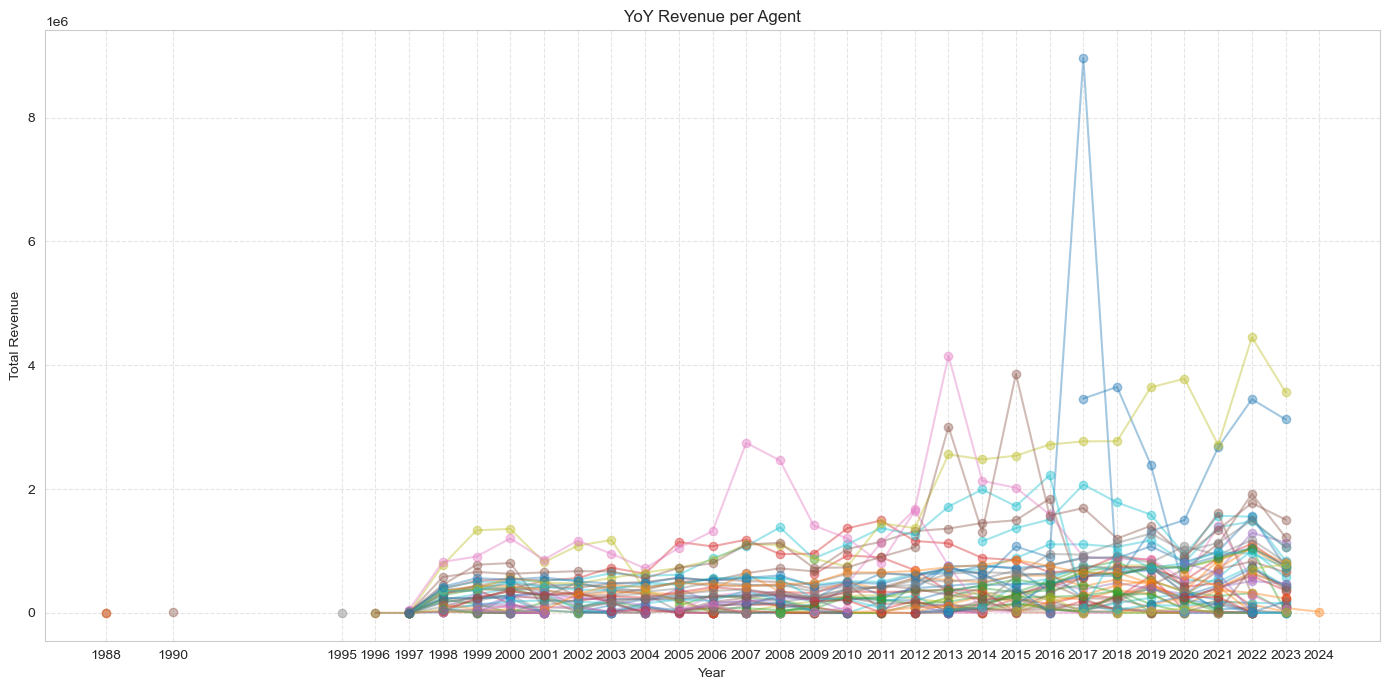

In [38]:
df_pivot = result4.pivot(index='Revenue_Year', columns='AgentId', values='Total_Revenue')

# Plot with smaller lines, low alpha for clarity
plt.figure(figsize=(14,7))
sns.set_style("whitegrid")

for col in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[col], marker='o', alpha=0.4)  # low alpha makes overlapping lines less cluttered

plt.title("YoY Revenue per Agent")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.xticks(result4['Revenue_Year'].sort_values().unique())
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [31]:
result3.to_csv("Rev_Agent.csv", index = False)

In [32]:
result3

,agentid,Agent,Total_Revenue
0,417,Caroline,1.568152e+09
1,417,Sarah,1.153053e+09
2,417,Emily,1.153053e+09
3,417,Mary,1.106931e+09
4,430,Sarah,9.686613e+08
...,...,...,...
21294,1000370,Rina,0.000000e+00
21295,1000446,Latisha,0.000000e+00
21296,1000446,Katie,0.000000e+00
21297,1000370,Jennie,0.000000e+00


In [10]:
result4.to_csv("YoY_Agent.csv", index = False)

In [98]:
result3.head()

,AgentId,Total_Revenue
0,417,46122119.81
1,430,31247138.53
2,155,27678216.64
3,253,20261934.75
4,413,20174922.12


In [44]:
query12 = """
WITH yearly_customers AS (
    SELECT 
        ct.AgentId,
        YEAR(ct.PaidDate) AS Revenue_Year,
        COUNT(DISTINCT ct.ArtistId) AS UniqueCustomers
    FROM dbo.ContractTransaction ct
    WHERE ct.PaidDate IS NOT NULL
    GROUP BY ct.AgentId, YEAR(ct.PaidDate)
),
joined_data AS (
    SELECT 
        curr.AgentId,
        curr.Revenue_Year,
        curr.UniqueCustomers AS CurrentYearCustomers,
        prev.UniqueCustomers AS PreviousYearCustomers
    FROM yearly_customers curr
    LEFT JOIN yearly_customers prev 
        ON curr.AgentId = prev.AgentId 
        AND curr.Revenue_Year = prev.Revenue_Year + 1
)
SELECT 
    jd.AgentId,
    jd.Revenue_Year,
    jd.CurrentYearCustomers,
    ISNULL(jd.PreviousYearCustomers, 0) AS PreviousYearCustomers,
    CASE 
        WHEN ISNULL(jd.PreviousYearCustomers, 0) = 0 THEN NULL
        ELSE ROUND(
            (jd.CurrentYearCustomers * 100.0 / jd.PreviousYearCustomers), 2
        )
    END AS Retention_Percentage,
    CASE 
        WHEN ISNULL(jd.PreviousYearCustomers, 0) = 0 THEN NULL
        WHEN jd.PreviousYearCustomers > jd.CurrentYearCustomers 
            THEN ROUND(
                (jd.PreviousYearCustomers - jd.CurrentYearCustomers) * 100.0 / jd.PreviousYearCustomers, 2
            )
        ELSE 0 
    END AS Attrition_Percentage
FROM joined_data jd
ORDER BY jd.AgentId, jd.Revenue_Year;
"""

result4 = pd.read_sql(query12, engine)

In [45]:
result4

,AgentId,Revenue_Year,CurrentYearCustomers,PreviousYearCustomers,Retention_Percentage,Attrition_Percentage
0,0,1998,19,0,NaN,NaN
1,0,1999,11,19,57.89,42.11
2,0,2000,2,11,18.18,81.82
3,0,2001,6,2,300.00,0.00
4,0,2007,1,0,NaN,NaN
...,...,...,...,...,...,...
1437,1000433,2023,4,0,NaN,NaN
1438,1000434,2023,0,0,NaN,NaN
1439,1000445,2023,2,0,NaN,NaN
1440,1000446,2023,0,0,NaN,NaN


In [49]:
result4 = result4[~((result4['CurrentYearCustomers'] == 0) | (result4['PreviousYearCustomers'] == 0))]


In [50]:
result4

,AgentId,Revenue_Year,CurrentYearCustomers,PreviousYearCustomers,Retention_Percentage,Attrition_Percentage
1,0,1999,11,19,57.89,42.11
2,0,2000,2,11,18.18,81.82
3,0,2001,6,2,300.00,0.00
5,0,2008,1,1,100.00,0.00
11,3,2024,1,1,100.00,0.00
...,...,...,...,...,...,...
1421,1000341,2022,56,1,5600.00,0.00
1422,1000341,2023,40,56,71.43,28.57
1424,1000355,2023,21,29,72.41,27.59
1427,1000359,2023,54,64,84.38,15.63


In [53]:
result4.to_csv("Att_Agent.csv", index = False)

In [52]:
result4

,AgentId,Revenue_Year,CurrentYearCustomers,PreviousYearCustomers,Retention_Percentage,Attrition_Percentage
1,0,1999,11,19,57.89,42.11
2,0,2000,2,11,18.18,81.82
3,0,2001,6,2,300.00,0.00
5,0,2008,1,1,100.00,0.00
11,3,2024,1,1,100.00,0.00
...,...,...,...,...,...,...
1421,1000341,2022,56,1,5600.00,0.00
1422,1000341,2023,40,56,71.43,28.57
1424,1000355,2023,21,29,72.41,27.59
1427,1000359,2023,54,64,84.38,15.63
